In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from time import time

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Exploratory Data Analysis

In [4]:
df['EDUCATION'] = df['EDUCATION'].replace(6,5)
df['EDUCATION'] = df['EDUCATION'].replace(0,5)
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

### Education

[Text(0, 0, 'Graduate School'),
 Text(1, 0, 'University'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Unknown')]

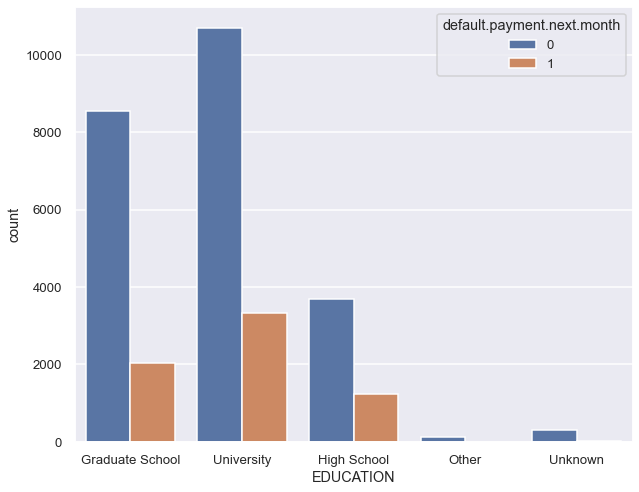

In [5]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other','Unknown'])

### Sex

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

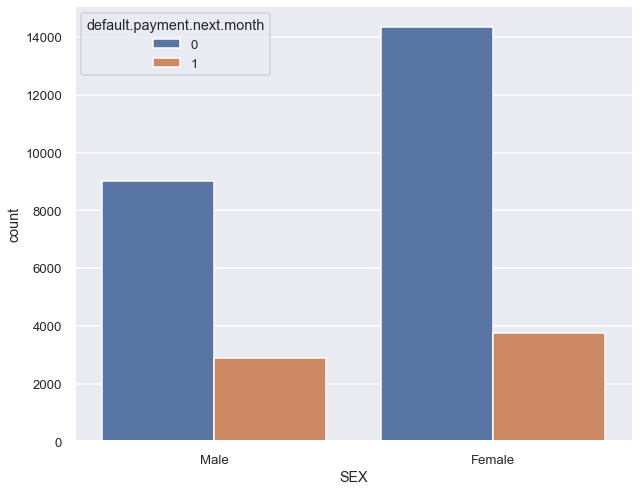

In [6]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
edu.set_xticklabels(['Male','Female'])

### Marriage

[Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Other')]

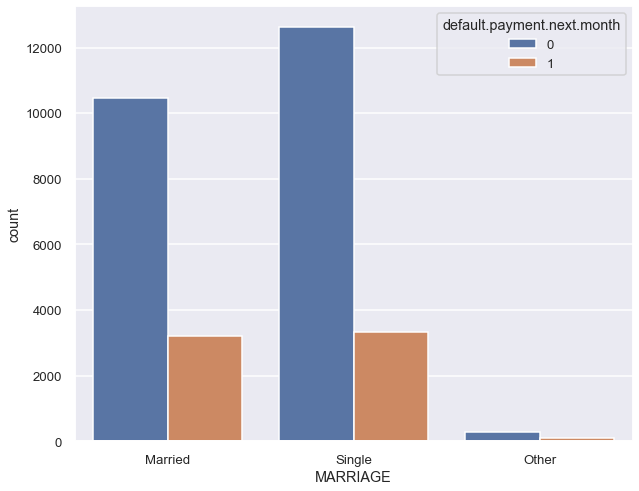

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df)
edu.set_xticklabels(['Married','Single','Other'])

### Age

<Figure size 432x432 with 0 Axes>

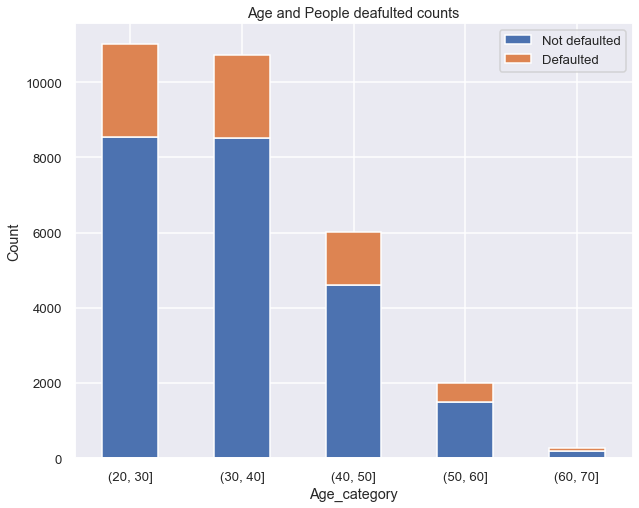

In [8]:
df['Age_category'] = pd.cut(df.AGE, bins=[20,30,40,50,60,70])
target_count = df.groupby(['Age_category','default.payment.next.month']).AGE.count().unstack()

plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

### Given Credit

<Figure size 432x432 with 0 Axes>

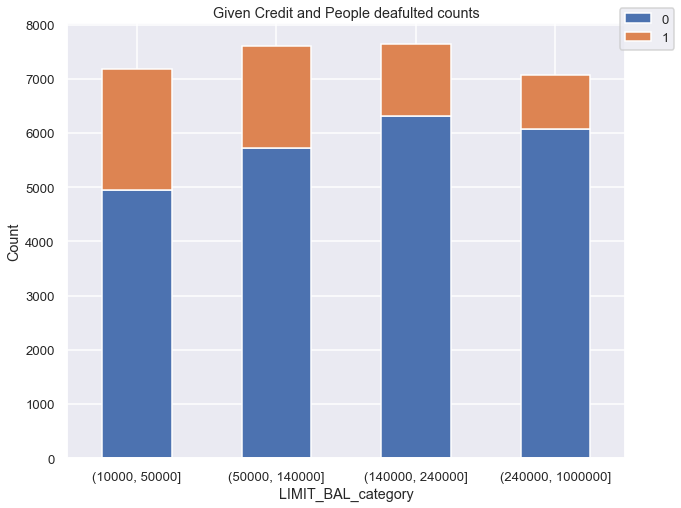

In [10]:
df['LIMIT_BAL_category'] = pd.cut(df.LIMIT_BAL, bins=[10000,50000,140000,240000,1000000])
target_count = df.groupby(['LIMIT_BAL_category','default.payment.next.month']).LIMIT_BAL.count().unstack()

plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Given Credit and People deafulted counts")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Correlation Coefficient

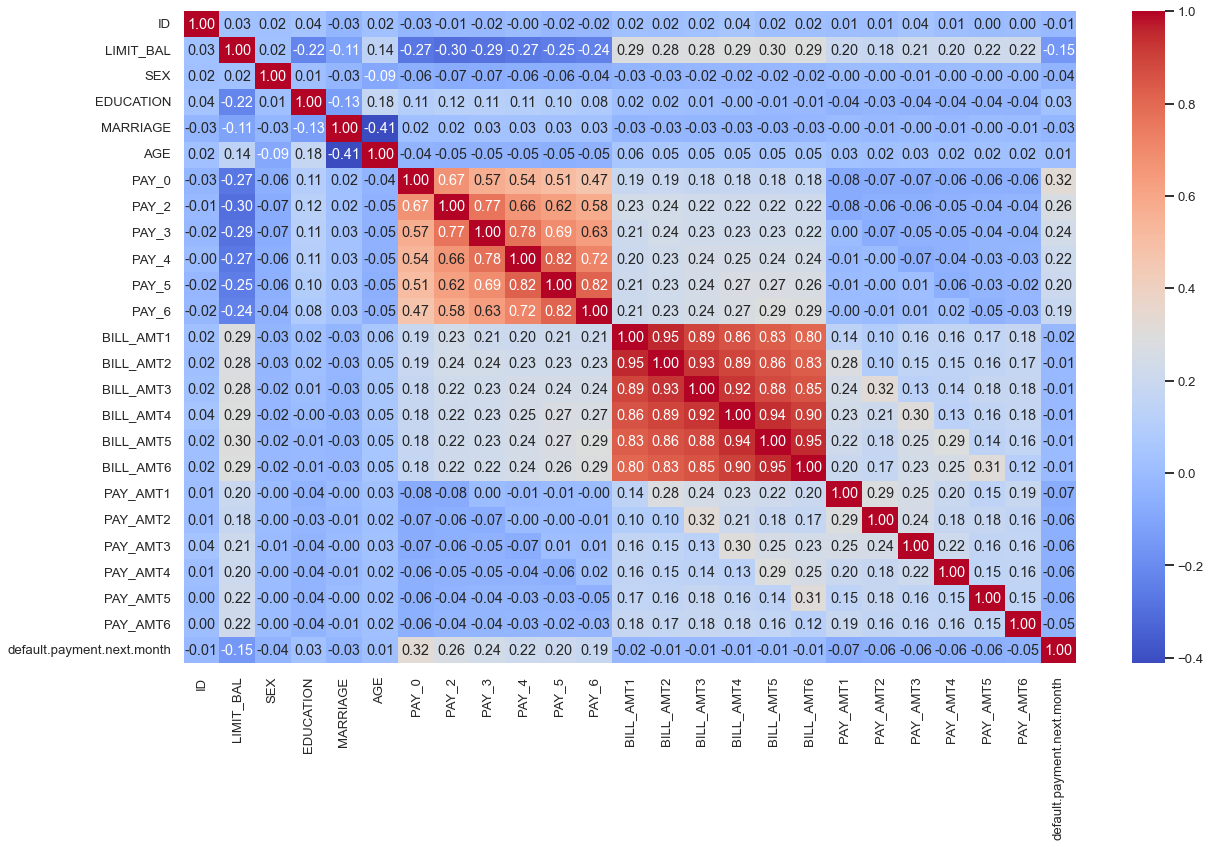

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

## Data Preparation

Basedo on the correlation score, we can see that there are several varibles have high correlation rate, so I decide to drop them 

In [16]:
df = pd.read_csv('UCI_Credit_Card.csv')
df['EDUCATION'] = df['EDUCATION'].replace(6,5)
df['EDUCATION'] = df['EDUCATION'].replace(0,5)
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [17]:
X = df.drop(['default.payment.next.month','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1)
y = df['default.payment.next.month']
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## SMOTE technique to balance the dataset

I will use SMOTE technique to balance the dataset.SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.The algorithm helps to overcome the overfitting problem posed by random sampling.

C:\Users\Jimmy Huang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

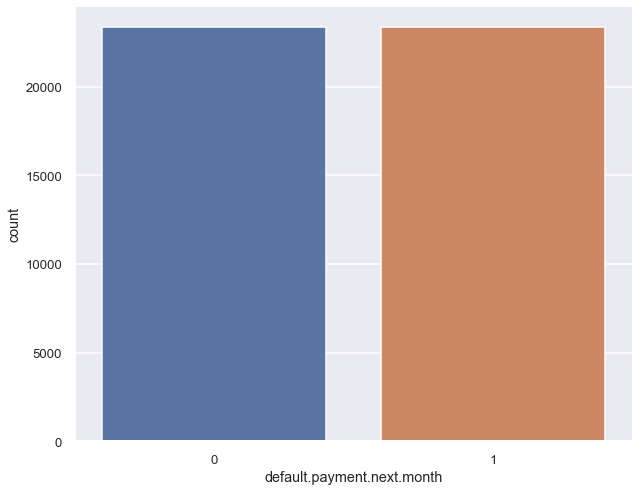

In [18]:
# count vector
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,y)


sns.countplot(Y_smote)

## Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,Y_smote,test_size=0.2, random_state=42)

In [20]:
print(f'   Train   Test   Total')
print(f'X: {X_train.shape[0]}   + {X_test.shape[0]}   = {X.shape[0]}')
print(f'y: {y_train.shape[0]}   + {y_test.shape[0]}   = {y.shape[0]}')

   Train   Test   Total
X: 37382   + 9346   = 30000
y: 37382   + 9346   = 30000


## Building Models

I will run several models for train dataset and choose the best 3 models based on accuracy score

### Ridge

In [21]:
Ridge = RidgeClassifier()

Ridge.fit(X_train, y_train)

Ridge_acc = Ridge.score(X_train, y_train)*100

Ridge_scores = cross_val_score(Ridge, X_train, y_train, cv=5)

print('Ridge Accuracy score is :', Ridge_scores.mean())

Ridge Accuracy score is : 0.7166018343537266


### DecisionTree

In [22]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)

dt.fit(X_train, y_train)

dt_acc = dt.score(X_train, y_train)*100

dt_scores = cross_val_score(dt, X_train, y_train, cv=5)

print('DecisionTree Accuracy score is :', dt_scores.mean())

DecisionTree Accuracy score is : 0.7441014330875072


### RandomForest

In [23]:
rf = RandomForestClassifier(max_depth=10)

rf.fit(X_train, y_train)

rf_acc = rf.score(X_train, y_train)*100

rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

print('RandomForest Accuracy score is :', rf_scores.mean())

RandomForest Accuracy score is : 0.779038095996619


### GradientBoosting

In [24]:
gb = GradientBoostingClassifier(max_depth=10)

gb.fit(X_train, y_train)

gb_acc = rf.score(X_train, y_train)*100

gb_scores = cross_val_score(gb, X_train, y_train, cv=5)

print('GradientBoosting Accuracy score is :', gb_scores.mean())


GradientBoosting Accuracy score is : 0.8238457290067999


### Support Vector 

In [25]:
svc = SVC()

svc.fit(X_train, y_train)

svc_acc = rf.score(X_train, y_train)*100

svc_scores = cross_val_score(gb, X_train, y_train, cv=5)

print('SVC Accuracy score is :', svc_acc.mean())


SVC Accuracy score is : 81.55529399176073


## Grid Search

Based on the results provided above, I choose three models with higest score to do the grid search

### GradientBoosting

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'subsample'    : [1.4,1.2,1, 0.8, 0.6, 0.4,0.2],
    'n_estimators' : [50,100,200,300,400,500],
    'max_depth'    : ['None',2,4,6,8,10]
}

gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(estimator = gb, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search_gb.fit(X_train, y_train)
grid_search_gb.score(X_train, y_train)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits


C:\Users\Jimmy Huang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.84085912 0.82577147 0.76269324]
  warnings.warn(


1.0

In [30]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.8}

In [26]:
grid_search_gb = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 500, subsample= 0.8)

grid_search_gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500, subsample=0.8)

GradientBoosting Accuracy score is : 84.85983308367216
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4664
           1       0.86      0.83      0.85      4682

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



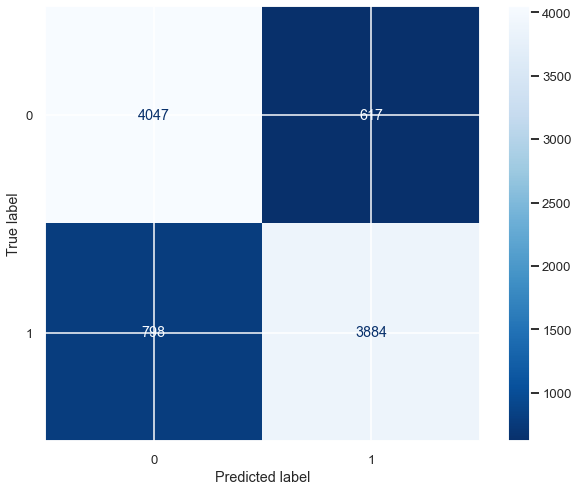

In [27]:
grid_search_gb_acc = grid_search_gb.score(X_test, y_test)*100

print('GradientBoosting Accuracy score is :', grid_search_gb_acc)

print( classification_report(y_test, grid_search_gb.predict(X_test)) )

plot_confusion_matrix(grid_search_gb, X_test, y_test, cmap="Blues_r")

plt.show()

### Support Vector

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}


svc = SVC()
grid_search_scv = GridSearchCV(estimator = svc, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search_scv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
grid_search_scv.best_params_